In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv("covid_19_clean_complete.csv",skipinitialspace=True)  #skipinitialspace=True--- to remove whitespaces
df.head(5)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [ ]:
df.shape
#to analyse the size of data

(49068, 10)

In [ ]:
#check if there is any null value
df.isnull().sum()

#since 34404 is a very large no of rows and null values are present only in the State column,we are keeping the null value as it is

,0
Province/State,34404
Country/Region,0
Lat,0
Long,0
Date,0
Confirmed,0
Deaths,0
Recovered,0
Active,0
WHO Region,0


In [ ]:
#check if there is any duplicate value

df.duplicated().sum()

0

In [ ]:
df.info()
#analyse the null columns-datatype,number of rows and columns, if any null values exist
#Here null values exist in Province/State columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [ ]:
#renaming the "Province/State", "Country/Region" columns for convenience
#inplace=True---makes this change permanent
df.rename(columns={"Province/State":"State","Country/Region":"Country"},inplace=True)

**Use pandas to accumulate data from multiple data files**

Top 5 countries where average confirmed cases are maximum

In [ ]:
#top 5 countries where average confirmed cases are maximum

df.groupby(by="Country")["Confirmed"].mean().sort_values(ascending=False).head(5).reset_index()

#sort_values(ascending=False)--sort in descending order
#head(5)---get the top 5 records
#reset_index()---reset the index[If this is not mentioned,here "Country" would be the index]

,Country,Confirmed
0,US,1.193330e+06
1,Brazil,4.761966e+05
2,Russia,2.415341e+05
3,India,2.174652e+05
4,Spain,1.457662e+05


Top 5 countries where average death cases are maximum

In [ ]:
#top 5 countries where average death cases are maximum

df.groupby(by="Country")["Deaths"].mean().sort_values(ascending=False).head(5).reset_index()

#sort_values(ascending=False)--sort in descending order
#head(5)---get the top 5 records
#reset_index()---reset the index[If this is not mentioned,here "Country" would be the index]

,Country,Deaths
0,US,58571.335106
1,Brazil,20946.989362
2,Italy,19721.898936
3,Spain,16133.138298
4,Mexico,9192.962766


Top 5 countries where average recovered cases are maximum

In [ ]:
#top 5 countries where average recovered cases are maximum

df.groupby(by="Country")["Recovered"].mean().sort_values(ascending=False).head(5).reset_index()

#sort_values(ascending=False)--sort in descending order
#head(5)---get the top 5 records
#reset_index()---reset the index[If this is not mentioned,here "Country" would be the index]

,Country,Recovered
0,US,299752.212766
1,Brazil,289855.707447
2,Russia,133619.404255
3,India,126509.148936
4,Germany,90999.143617


Top 5 countries where average active cases are maximum

In [ ]:
#top 5 countries where average active cases are maximum

df.groupby(by="Country")["Active"].mean().sort_values(ascending=False).head(5).reset_index()

#sort_values(ascending=False)--sort in descending order
#head(5)---get the top 5 records
#reset_index()---reset the index[If this is not mentioned,here "Country" would be the index]

,Country,Active
0,US,835005.962766
1,Brazil,165393.936170
2,Russia,104620.095745
3,India,85042.090426
4,Spain,49348.042553


Average Confirmed,Active,Death and Recovered cases in India on each day

In [ ]:
#filtering data related to India
df_india=df[df["Country"]=="India"]

#Confirmed,Active,Death and Active cases in India on each day
df_india.groupby("Date")[["Confirmed","Active","Deaths","Recovered"]].mean().reset_index()

,Date,Confirmed,Active,Deaths,Recovered
0,2020-01-22,0.0,0.0,0.0,0.0
1,2020-01-23,0.0,0.0,0.0,0.0
2,2020-01-24,0.0,0.0,0.0,0.0
3,2020-01-25,0.0,0.0,0.0,0.0
4,2020-01-26,0.0,0.0,0.0,0.0
...,...,...,...,...,...
183,2020-07-23,1288108.0,440298.0,30601.0,817209.0
184,2020-07-24,1337024.0,456234.0,31358.0,849432.0
185,2020-07-25,1385635.0,468002.0,32060.0,885573.0
186,2020-07-26,1435616.0,485277.0,32771.0,917568.0


Average Confirmed,Active,Death and Recovered cases in India on each month

In [ ]:
#convert datatype of date column to datetime
df_india['Date']=pd.to_datetime(df_india['Date'])

#create 'month' column which would contain the month detail
df_india['Month']=df_india['Date'].dt.month

#aggregate based on the month data and find the average details
df_india.groupby("Month")[["Confirmed","Active","Deaths","Recovered"]].mean().reset_index()

,Month,Confirmed,Active,Deaths,Recovered
0,1,0.200000,0.200000,0.000000,0.000000
1,2,2.896552,1.448276,0.000000,1.448276
2,3,330.709677,297.032258,7.290323,26.387097
3,4,14920.233333,11579.300000,480.566667,2860.366667
4,5,99628.838710,57335.032258,3037.225806,39256.580645
5,6,365057.100000,156794.966667,11061.866667,197200.266667
6,7,977233.777778,338890.629630,24858.444444,613484.703704


Average Confirmed,Active,Death and Recovered cases in US on each day

In [ ]:
#filtering data related to India
df_US=df[df["Country"]=="US"]

#Confirmed,Active,Death and Active cases in India on each day
df_US.groupby("Date")[["Confirmed","Active","Deaths","Recovered"]].mean().reset_index()

,Date,Confirmed,Active,Deaths,Recovered
0,2020-01-22,1.0,1.0,0.0,0.0
1,2020-01-23,1.0,1.0,0.0,0.0
2,2020-01-24,2.0,2.0,0.0,0.0
3,2020-01-25,2.0,2.0,0.0,0.0
4,2020-01-26,5.0,5.0,0.0,0.0
...,...,...,...,...,...
183,2020-07-23,4038816.0,2661117.0,144430.0,1233269.0
184,2020-07-24,4112531.0,2705347.0,145560.0,1261624.0
185,2020-07-25,4178970.0,2753091.0,146465.0,1279414.0
186,2020-07-26,4233923.0,2789125.0,146935.0,1297863.0


Average Confirmed,Active,Death and Recovered cases in US on each month

In [ ]:
#convert datatype of date column to datetime
df_US['Date']=pd.to_datetime(df_US['Date'])

#create 'month' column which would contain the month detail
df_US['Month']=df_US['Date'].dt.month

#aggregate based on the month data and find the average details
df_US.groupby("Month")[["Confirmed","Active","Deaths","Recovered"]].mean().reset_index()

,Month,Confirmed,Active,Deaths,Recovered
0,1,3.800000e+00,3.800000e+00,0.000000,0.000000e+00
1,2,1.303448e+01,9.965517e+00,0.034483,3.034483e+00
2,3,3.519574e+04,3.371542e+04,843.870968,6.364516e+02
3,4,6.517527e+05,5.589864e+05,34500.433333,5.826590e+04
4,5,1.464760e+06,1.095447e+06,88021.806452,2.812918e+05
5,6,2.164461e+06,1.466033e+06,117284.566667,5.811432e+05
6,7,3.457795e+06,2.267636e+06,137149.037037,1.053010e+06


Average Confirmed,Active,Death and Recovered cases in Brazil on each day

In [ ]:
#filtering data related to India
df_brazil=df[df["Country"]=="Brazil"]

#Confirmed,Active,Death and Active cases in India on each day
df_brazil.groupby("Date")[["Confirmed","Active","Deaths","Recovered"]].mean().reset_index()

,Date,Confirmed,Active,Deaths,Recovered
0,2020-01-22,0.0,0.0,0.0,0.0
1,2020-01-23,0.0,0.0,0.0,0.0
2,2020-01-24,0.0,0.0,0.0,0.0
3,2020-01-25,0.0,0.0,0.0,0.0
4,2020-01-26,0.0,0.0,0.0,0.0
...,...,...,...,...,...
183,2020-07-23,2287475.0,583080.0,84082.0,1620313.0
184,2020-07-24,2343366.0,564914.0,85238.0,1693214.0
185,2020-07-25,2394513.0,522705.0,86449.0,1785359.0
186,2020-07-26,2419091.0,519174.0,87004.0,1812913.0


Average Confirmed,Active,Death and Recovered cases in Brazil on each month

In [ ]:
#convert datatype of date column to datetime
df_brazil['Date']=pd.to_datetime(df_brazil['Date'])

#create 'month' column which would contain the month detail
df_brazil['Month']=df_brazil['Date'].dt.month

#aggregate based on the month data and find the average details
df_brazil.groupby("Month")[["Confirmed","Active","Deaths","Recovered"]].mean().reset_index()

,Month,Confirmed,Active,Deaths,Recovered
0,1,0.000000e+00,0.000000,0.000000,0.000000e+00
1,2,1.724138e-01,0.172414,0.000000,0.000000e+00
2,3,1.197645e+03,1156.806452,31.483871,9.354839e+00
3,4,3.495020e+04,19368.066667,2219.033333,1.336310e+04
4,5,2.562673e+05,136403.903226,16420.322581,1.034430e+05
5,6,9.387074e+05,400903.166667,45113.066667,4.926912e+05
6,7,1.938290e+06,526723.555556,74372.777778,1.337193e+06


Each date in the dataset with total number of Active,Death,Confirmed,Recovered Cases on each day

In [ ]:
#convert datatype of date column to datetime
df['Date']=pd.to_datetime(df['Date'])

#create 'month' column which would contain the month detail
df['Month']=df['Date'].dt.month

In [ ]:
top_dates=df.groupby("Date")[["Confirmed","Active","Deaths","Recovered"]].sum().reset_index()
top_dates['Total']=top_dates['Confirmed']+top_dates['Active']+top_dates['Deaths']+top_dates['Recovered']
top_dates

,Date,Confirmed,Active,Deaths,Recovered,Total
0,2020-01-22,555,510,17,28,1110
1,2020-01-23,654,606,18,30,1308
2,2020-01-24,941,879,26,36,1882
3,2020-01-25,1434,1353,42,39,2868
4,2020-01-26,2118,2010,56,52,4236
...,...,...,...,...,...,...
183,2020-07-23,15510481,6166006,633506,8710969,31020962
184,2020-07-24,15791645,6212290,639650,8939705,31583290
185,2020-07-25,16047190,6243930,644517,9158743,32094380
186,2020-07-26,16251796,6309711,648621,9293464,32503592


top 5 dates in the dataset with highest total number of Active,Death,Confirmed,Recovered Cases on each day

In [ ]:
top_dates.sort_values(by="Total",ascending=False).head(5)

,Date,Confirmed,Active,Deaths,Recovered,Total
187,2020-07-27,16480485,6358362,654036,9468087,32960970
186,2020-07-26,16251796,6309711,648621,9293464,32503592
185,2020-07-25,16047190,6243930,644517,9158743,32094380
184,2020-07-24,15791645,6212290,639650,8939705,31583290
183,2020-07-23,15510481,6166006,633506,8710969,31020962


top 3 months in the dataset with highest total number of Active,Death,Confirmed,Recovered Cases on each day

In [ ]:
top_months=df.groupby("Month")[["Active","Confirmed","Recovered","Deaths"]].sum().reset_index()
top_months['Total']=top_months["Active"]+top_months["Recovered"]+top_months["Deaths"]+top_months["Confirmed"]
top_months.nlargest(3,"Total")

,Month,Active,Confirmed,Recovered,Deaths,Total
6,7,147591957,362895848,199594224,15709667,725791696
5,6,116232466,246525787,116984268,13309053,493051574
4,5,82503957,144990399,52876838,9609604,289980798


Region wise data of Confirmed,Death,Active,Recovered Cases

In [ ]:
df_Region=df.pivot_table(index=["WHO Region"],values=["Confirmed","Active","Deaths","Recovered"],aggfunc="sum",margins=True).reset_index()
df_Region
#margins- To get sum of the cases[Row named "All"]

,WHO Region,Active,Confirmed,Deaths,Recovered
0,Africa,10158119,21791827,439978,11193730
1,Americas,225832458,402261194,19359292,157069444
2,Eastern Mediterranean,24108160,74082892,1924029,48050703
3,Europe,106406678,248879793,19271040,123202075
4,South-East Asia,23629904,55118365,1458134,30030327
5,Western Pacific,6580031,26374411,932430,18861950
6,All,396715350,828508482,43384903,388408229


**Use plotly for visualizations**

In [ ]:
# Importing plotly library
import plotly
import plotly.express as px

In [ ]:
world = df.groupby(by='Country')[['Confirmed','Active','Deaths','Recovered']].sum().reset_index()
world

,Country,Confirmed,Active,Deaths,Recovered
0,Afghanistan,1936390,1089052,49098,798240
1,Albania,196702,72117,5708,118877
2,Algeria,1179755,345886,77972,755897
3,Andorra,94404,19907,5423,69074
4,Angola,22662,15011,1078,6573
...,...,...,...,...,...
182,West Bank and Gaza,233461,170967,1370,61124
183,Western Sahara,901,190,63,648
184,Yemen,67180,25694,17707,23779
185,Zambia,129421,43167,2643,83611


In [ ]:
# visualizing using plotly library
#choropleth- to visulise the info using world map

figure = px.choropleth(world,locations='Country',
                        locationmode = 'country names',
                        color='Active',
                        hover_name='Country', range_color=[1,20000],
                        color_continuous_scale='reds',
                        title='Countries with Active Cases')
figure.show()

#hover_name-if we hover over a region, we will get the country_name
#range_color-changing the color range of countries as per the number of cases in that particular country

In [ ]:
# visualizing using plotly library
#choropleth- to visulise the info using world map

figure = px.choropleth(world,locations='Country',
                        locationmode = 'country names',
                        color='Recovered',
                        hover_name='Country', range_color=[1,20000],
                        color_continuous_scale='greens',
                        title='Countries with Recovered Cases')
figure.show()

#hover_name-if we hover over a region, we will get the country_name
#range_color-changing the color range of countries as per the number of cases in that particular country

In [ ]:
# visualizing using plotly library
#choropleth- to visulise the info using world map

figure = px.choropleth(world,locations='Country',
                        locationmode = 'country names',
                        color='Deaths',
                        hover_name='Country', range_color=[1,20000],
                        color_continuous_scale='thermal',
                        title='Countries with Death Cases')
figure.show()

#hover_name-if we hover over a region, we will get the country_name
#range_color-changing the color range of countries as per the number of cases in that particular country

In [ ]:
# visualizing using plotly library
#choropleth- to visulise the info using world map

figure = px.choropleth(world,locations='Country',
                        locationmode = 'country names',
                        color='Confirmed',
                        hover_name='Country', range_color=[1,20000],
                        color_continuous_scale='armyrose',
                        title='Countries with Confirmed Cases')
figure.show()

#hover_name-if we hover over a region, we will get the country_name
#range_color-changing the color range of countries as per the number of cases in that particular country

**Applying facebook prophet for time series model**

In [ ]:
from prophet import Prophet
m=Prophet()

Forecasting For Confirmed Cases

In [ ]:
confirmed=df.groupby("Date")["Confirmed"].sum().reset_index()
confirmed

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


In [ ]:
#The input to Prophet is always a dataframe with two columns: ds and y
#Therefore renaming the columns

confirmed.rename(columns={"Date":"ds","Confirmed":"y"},inplace=True)

In [ ]:
m.fit(confirmed)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy4hl649p/wm6wt5bk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy4hl649p/4haqs2f7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15941', 'data', 'file=/tmp/tmpy4hl649p/wm6wt5bk.json', 'init=/tmp/tmpy4hl649p/4haqs2f7.json', 'output', 'file=/tmp/tmpy4hl649p/prophet_modelh5aiebhh/prophet_model-20241223141219.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:12:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:12:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
#adding next 7 days for prediction
future=m.make_future_dataframe(periods=7)
print(future.to_string()) #7 more days are added to this dataframe

            ds
0   2020-01-22
1   2020-01-23
2   2020-01-24
3   2020-01-25
4   2020-01-26
5   2020-01-27
6   2020-01-28
7   2020-01-29
8   2020-01-30
9   2020-01-31
10  2020-02-01
11  2020-02-02
12  2020-02-03
13  2020-02-04
14  2020-02-05
15  2020-02-06
16  2020-02-07
17  2020-02-08
18  2020-02-09
19  2020-02-10
20  2020-02-11
21  2020-02-12
22  2020-02-13
23  2020-02-14
24  2020-02-15
25  2020-02-16
26  2020-02-17
27  2020-02-18
28  2020-02-19
29  2020-02-20
30  2020-02-21
31  2020-02-22
32  2020-02-23
33  2020-02-24
34  2020-02-25
35  2020-02-26
36  2020-02-27
37  2020-02-28
38  2020-02-29
39  2020-03-01
40  2020-03-02
41  2020-03-03
42  2020-03-04
43  2020-03-05
44  2020-03-06
45  2020-03-07
46  2020-03-08
47  2020-03-09
48  2020-03-10
49  2020-03-11
50  2020-03-12
51  2020-03-13
52  2020-03-14
53  2020-03-15
54  2020-03-16
55  2020-03-17
56  2020-03-18
57  2020-03-19
58  2020-03-20
59  2020-03-21
60  2020-03-22
61  2020-03-23
62  2020-03-24
63  2020-03-25
64  2020-03-26
65  2020-0

In [ ]:
forecast_confirmed=m.predict(future)
forecast_confirmed.tail(7)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
188,2020-07-28,1.633705e+07,1.621746e+07,1.642479e+07,1.633705e+07,1.633705e+07,-16846.245488,-16846.245488,-16846.245488,-16846.245488,-16846.245488,-16846.245488,0.0,0.0,0.0,1.632020e+07
189,2020-07-29,1.654104e+07,1.642627e+07,1.663678e+07,1.654014e+07,1.654322e+07,-11063.561776,-11063.561776,-11063.561776,-11063.561776,-11063.561776,-11063.561776,0.0,0.0,0.0,1.652997e+07
190,2020-07-30,1.674503e+07,1.663239e+07,1.684086e+07,1.674023e+07,1.675115e+07,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,0.0,0.0,0.0,1.674391e+07
191,2020-07-31,1.694902e+07,1.685607e+07,1.707109e+07,1.693897e+07,1.696097e+07,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,0.0,0.0,0.0,1.695910e+07
192,2020-08-01,1.715301e+07,1.706201e+07,1.727878e+07,1.713355e+07,1.717231e+07,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,0.0,0.0,0.0,1.716676e+07
193,2020-08-02,1.735700e+07,1.724998e+07,1.747966e+07,1.732799e+07,1.738620e+07,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,0.0,0.0,0.0,1.736430e+07
194,2020-08-03,1.756099e+07,1.744391e+07,1.766825e+07,1.752180e+07,1.760473e+07,-2102.756726,-2102.756726,-2102.756726,-2102.756726,-2102.756726,-2102.756726,0.0,0.0,0.0,1.755889e+07


In [ ]:
forecast_confirmed[['ds','yhat','yhat_lower','yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
188,2020-07-28,1.632020e+07,1.621746e+07,1.642479e+07
189,2020-07-29,1.652997e+07,1.642627e+07,1.663678e+07
190,2020-07-30,1.674391e+07,1.663239e+07,1.684086e+07
191,2020-07-31,1.695910e+07,1.685607e+07,1.707109e+07
192,2020-08-01,1.716676e+07,1.706201e+07,1.727878e+07
193,2020-08-02,1.736430e+07,1.724998e+07,1.747966e+07
194,2020-08-03,1.755889e+07,1.744391e+07,1.766825e+07


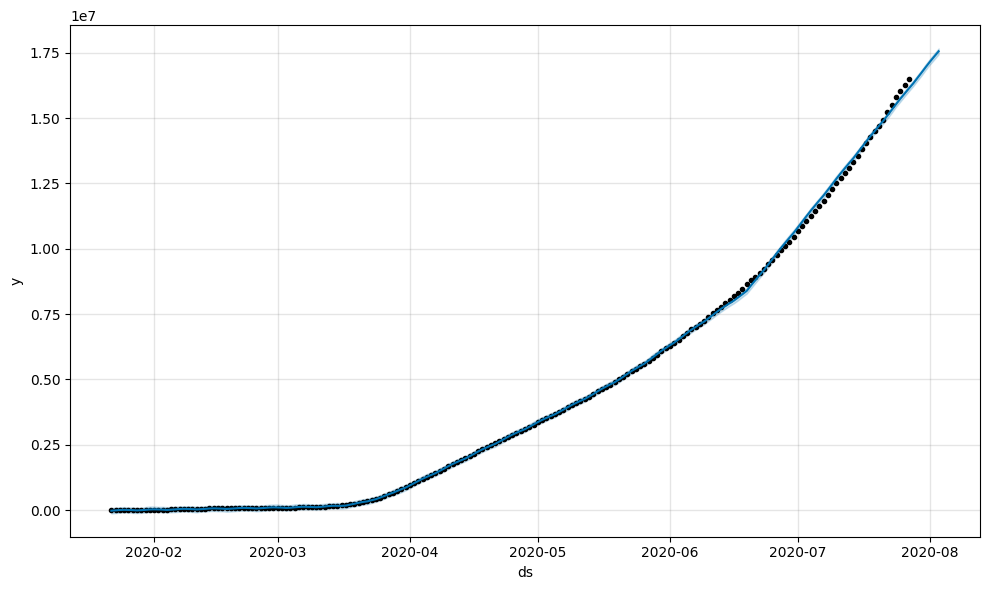

In [ ]:
import matplotlib.pyplot as plt
m.plot(forecast_confirmed)
plt.show()

Forecasting for Active Cases

In [ ]:
active=df.groupby("Date")["Active"].sum().reset_index()
active

,Date,Active
0,2020-01-22,510
1,2020-01-23,606
2,2020-01-24,879
3,2020-01-25,1353
4,2020-01-26,2010
...,...,...
183,2020-07-23,6166006
184,2020-07-24,6212290
185,2020-07-25,6243930
186,2020-07-26,6309711


In [ ]:
#The input to Prophet is always a dataframe with two columns: ds and y
#Therefore renaming the columns

active.rename(columns={"Date":"ds","Active":"y"},inplace=True)

In [ ]:
a=Prophet()
a.fit(active)

Active_predict=a.predict(future)
Active_predict.tail(7)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy4hl649p/kblh8o7v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy4hl649p/7ouzztuv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48648', 'data', 'file=/tmp/tmpy4hl649p/kblh8o7v.json', 'init=/tmp/tmpy4hl649p/7ouzztuv.json', 'output', 'file=/tmp/tmpy4hl649p/prophet_modelklvszeow/prophet_model-20241223141220.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:12:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:12:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
188,2020-07-28,6.359282e+06,6.306990e+06,6.395598e+06,6.359282e+06,6.359282e+06,-5866.946694,-5866.946694,-5866.946694,-5866.946694,-5866.946694,-5866.946694,0.0,0.0,0.0,6.353415e+06
189,2020-07-29,6.421550e+06,6.368712e+06,6.462685e+06,6.420782e+06,6.422169e+06,-5734.813501,-5734.813501,-5734.813501,-5734.813501,-5734.813501,-5734.813501,0.0,0.0,0.0,6.415815e+06
190,2020-07-30,6.483817e+06,6.434377e+06,6.529117e+06,6.480862e+06,6.486242e+06,-2543.414742,-2543.414742,-2543.414742,-2543.414742,-2543.414742,-2543.414742,0.0,0.0,0.0,6.481274e+06
191,2020-07-31,6.546085e+06,6.504384e+06,6.597381e+06,6.540065e+06,6.550938e+06,3230.786676,3230.786676,3230.786676,3230.786676,3230.786676,3230.786676,0.0,0.0,0.0,6.549315e+06
192,2020-08-01,6.608352e+06,6.566712e+06,6.655125e+06,6.599174e+06,6.616260e+06,3128.003846,3128.003846,3128.003846,3128.003846,3128.003846,3128.003846,0.0,0.0,0.0,6.611480e+06
193,2020-08-02,6.670619e+06,6.625225e+06,6.727205e+06,6.655480e+06,6.682194e+06,8151.914786,8151.914786,8151.914786,8151.914786,8151.914786,8151.914786,0.0,0.0,0.0,6.678771e+06
194,2020-08-03,6.732887e+06,6.682437e+06,6.779983e+06,6.712198e+06,6.749077e+06,-365.530371,-365.530371,-365.530371,-365.530371,-365.530371,-365.530371,0.0,0.0,0.0,6.732521e+06


In [ ]:
Active_predict[['ds','yhat','yhat_lower','yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
188,2020-07-28,6.353415e+06,6.306990e+06,6.395598e+06
189,2020-07-29,6.415815e+06,6.368712e+06,6.462685e+06
190,2020-07-30,6.481274e+06,6.434377e+06,6.529117e+06
191,2020-07-31,6.549315e+06,6.504384e+06,6.597381e+06
192,2020-08-01,6.611480e+06,6.566712e+06,6.655125e+06
193,2020-08-02,6.678771e+06,6.625225e+06,6.727205e+06
194,2020-08-03,6.732521e+06,6.682437e+06,6.779983e+06


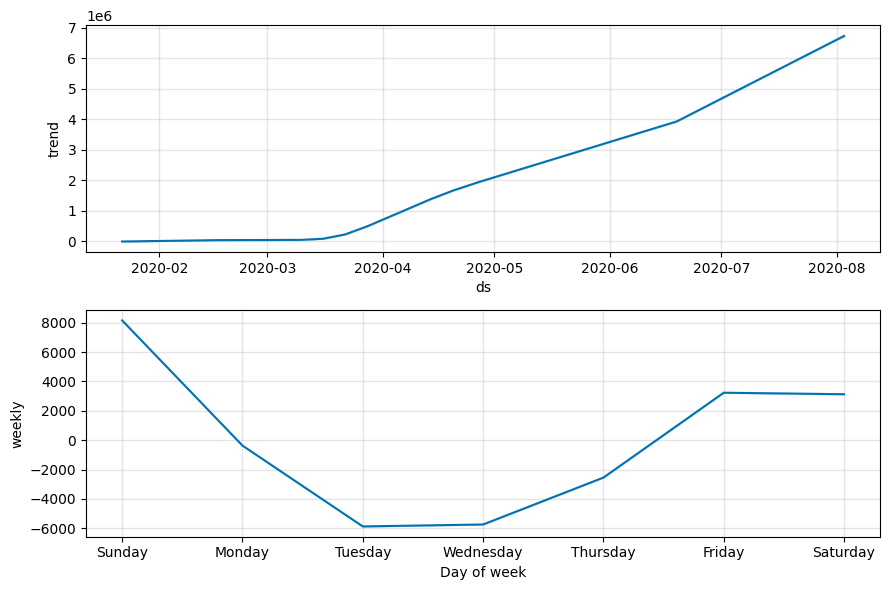

In [ ]:
a.plot_components(Active_predict)
plt.show()

Forecasting for Deaths Cases

In [ ]:
deaths=df.groupby("Date")["Deaths"].sum().reset_index()
deaths

,Date,Deaths
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,26
3,2020-01-25,42
4,2020-01-26,56
...,...,...
183,2020-07-23,633506
184,2020-07-24,639650
185,2020-07-25,644517
186,2020-07-26,648621


In [ ]:
#The input to Prophet is always a dataframe with two columns: ds and y
#Therefore renaming the columns

deaths.rename(columns={"Date":"ds","Deaths":"y"},inplace=True)

In [ ]:
d=Prophet()
d.fit(deaths)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy4hl649p/4jxbtlme.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy4hl649p/zcqepd87.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47998', 'data', 'file=/tmp/tmpy4hl649p/4jxbtlme.json', 'init=/tmp/tmpy4hl649p/zcqepd87.json', 'output', 'file=/tmp/tmpy4hl649p/prophet_modelnapqp640/prophet_model-20241223141221.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:12:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:12:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
death_confirmed=d.predict(future)[['ds','yhat','yhat_lower','yhat_upper']].tail(7)

In [ ]:
from prophet.plot import plot_plotly

plot_plotly(d, death_confirmed)


Forecasting for Recovered Cases

In [ ]:
recovered=df.groupby("Date")["Recovered"].sum().reset_index()
recovered

,Date,Recovered
0,2020-01-22,28
1,2020-01-23,30
2,2020-01-24,36
3,2020-01-25,39
4,2020-01-26,52
...,...,...
183,2020-07-23,8710969
184,2020-07-24,8939705
185,2020-07-25,9158743
186,2020-07-26,9293464


In [ ]:
#The input to Prophet is always a dataframe with two columns: ds and y
#Therefore renaming the columns

recovered.rename(columns={"Date":"ds","Recovered":"y"},inplace=True)

In [ ]:
r=Prophet()
r.fit(recovered)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy4hl649p/_q6dx_wq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy4hl649p/10n_9cwg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64915', 'data', 'file=/tmp/tmpy4hl649p/_q6dx_wq.json', 'init=/tmp/tmpy4hl649p/10n_9cwg.json', 'output', 'file=/tmp/tmpy4hl649p/prophet_modelobrk8lsx/prophet_model-20241223141222.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:12:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:12:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
recovered_cases=r.predict(future)[['ds','yhat','yhat_lower','yhat_upper']].tail(7)
recovered_cases

,ds,yhat,yhat_lower,yhat_upper
188,2020-07-28,9.311028e+06,9.227650e+06,9.386130e+06
189,2020-07-29,9.453130e+06,9.370987e+06,9.531271e+06
190,2020-07-30,9.595783e+06,9.513646e+06,9.678449e+06
191,2020-07-31,9.737182e+06,9.656357e+06,9.822220e+06
192,2020-08-01,9.877343e+06,9.793398e+06,9.960517e+06
193,2020-08-02,1.000332e+07,9.920818e+06,1.009326e+07
194,2020-08-03,1.013982e+07,1.005391e+07,1.023243e+07


**Visualise the prediction**

In [ ]:
data=pd.DataFrame()
data["Date"]=future
data["Confirmed"]=forecast_confirmed["yhat"]
data["Active"]=Active_predict["yhat"]
death_confirmed=d.predict(future)
data["Death"]=death_confirmed["yhat"]
recovered_cases=r.predict(future)
data["Recovered"]=recovered_cases["yhat"]
data

,Date,Confirmed,Active,Death,Recovered
0,2020-01-22,-2.067684e+04,-6.240003e+03,-713.300051,-1.844211e+04
1,2020-01-23,-8.050948e+03,-1.186216e+03,-43.747057,-1.118185e+04
2,2020-01-24,5.827455e+03,6.450374e+03,531.538048,-5.175679e+03
3,2020-01-25,1.217668e+04,8.209979e+03,473.857138,-4.075673e+02
4,2020-01-26,8.405020e+03,1.509628e+04,-328.938355,-9.825667e+03
...,...,...,...,...,...
190,2020-07-30,1.674391e+07,6.481274e+06,663491.395651,9.595783e+06
191,2020-07-31,1.695910e+07,6.549315e+06,669006.394312,9.737182e+06
192,2020-08-01,1.716676e+07,6.611480e+06,673888.426957,9.877343e+06
193,2020-08-02,1.736430e+07,6.678771e+06,678025.345020,1.000332e+07


In [ ]:
import plotly.express as px
# Create line graph
fig = px.line(data, x="Date", y=["Confirmed", "Active", "Death", "Recovered"], title="COVID-19 Predictions Over Time")
fig.show()
